# Activity Conclusion

After completion of this activity i got following results on sentiment classification by naives bayes

Precision: 0.805

Recall: Recall: 0.809

F1 Score: 0.807

Training Data Accuracy: 0.984375

Testing Data Accuracy: 0.807

Smothing Method: Lapplace Smothing Method

Did not used any other method.

# Necessary Dependencies

In [4]:
import pandas as pd     #packages for data analysis
import neattext as nt   #package for text cleaning
import seaborn as sns   #package for data visualization
from sklearn.feature_extraction.text import CountVectorizer  #importing bag of words -> for converting text into vectors
import os   #for dealing with system file paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Data Preparation

### Reading the Postive Review Files

In [82]:
ptive_reviews_files=os.listdir('./movie_reviews/pos/')

In [83]:
files_lst=[]

In [84]:
for i in ptive_reviews_files:
#     print(i)
    f=open('./pos/'+i,'r')
    f=f.read()
    files_lst.append(f)

In [85]:
ptive_reviews=pd.DataFrame(files_lst)
ptive_reviews['Sentiment']=1
ptive_reviews.columns=['review text','sentiment']

### Reading the Negative Review Files

In [86]:
ntive_reviews=os.listdir('./movie_reviews/neg/')

In [87]:
files_lst=[]

In [88]:
for i in ntive_reviews:
#     print(i)
    f=open('./neg/'+i,'r')
    f=f.read()
    files_lst.append(f)

In [89]:
ntive_reviews=pd.DataFrame(files_lst)
ntive_reviews['Sentiment']=0
ntive_reviews.columns=['review text','sentiment']

## Merging both Positve and Negative Files

In [90]:
reviews_df=pd.concat([ptive_reviews,ntive_reviews])

### View of Final Data

In [91]:
reviews_df

,review text,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",0
996,"john boorman's "" zardoz "" is a goofy cinematic...",0
997,the kids in the hall are an acquired taste . \...,0
998,there was a time when john carpenter was a gre...,0


### Shape of the Data

In [92]:
reviews_df.shape

(2000, 2)

# Distribution of Sentiments

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

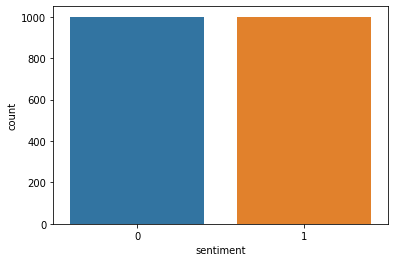

In [93]:
sns.countplot(reviews_df['sentiment'])

# Text Cleaning

Fixing Contractions => don't -> do not

In [94]:
reviews_df['review text']=reviews_df['review text'].apply(lambda x:nt.fix_contractions(x))

In [95]:
reviews_df['review text']=reviews_df['review text'].apply(lambda x:nt.remove_puncts(x))
reviews_df['review text']=reviews_df['review text'].apply(lambda x:nt.remove_numbers(x))
reviews_df['review text']=reviews_df['review text'].apply(lambda x:nt.remove_stopwords(x))
reviews_df['review text']=reviews_df['review text'].apply(lambda x:nt.remove_emojis(x))

# ML Model Preparation

### Spliting the Data into dev and test Data

In [96]:
X=reviews_df['review text']
y=reviews_df['sentiment']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Converting Text Data into Vectors with Bag of Words

In [98]:
cv = CountVectorizer()

In [99]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [100]:
# vectorizer = TfidfVectorizer(max_features=4000)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.fit_transform(X_test)
# y_train =y_train
# y_test =y_test


### Importing the Model

Laplace Smothing: We can implement laplace smothing in naive bayes by simply setting alpha paramter to 1

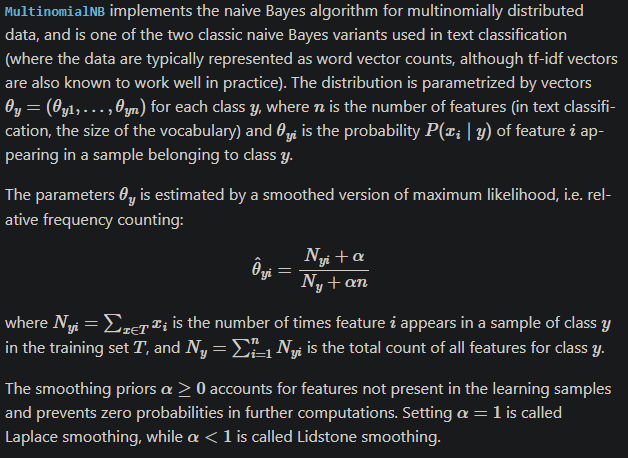

In [101]:
from sklearn.naive_bayes import MultinomialNB

### Model Training and Testing

In [102]:
model = MultinomialNB(alpha=1)  #alpha=1 for laplace smothing
model.fit(X_train, y_train)

MultinomialNB(alpha=1)

### Training Accuracy

In [103]:
model.score(X_train, y_train)

0.984375

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import plot_confusion_matrix

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


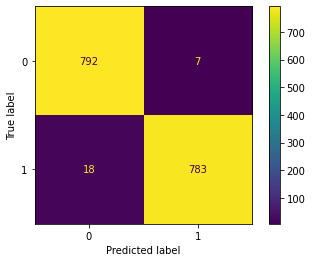

In [108]:
plot_confusion_matrix(model, X_train, y_train)

### Recall

In [109]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.809


### Precision Score

In [110]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.805


### Accuracy

In [111]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.807


### F1 Score

In [112]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.807
